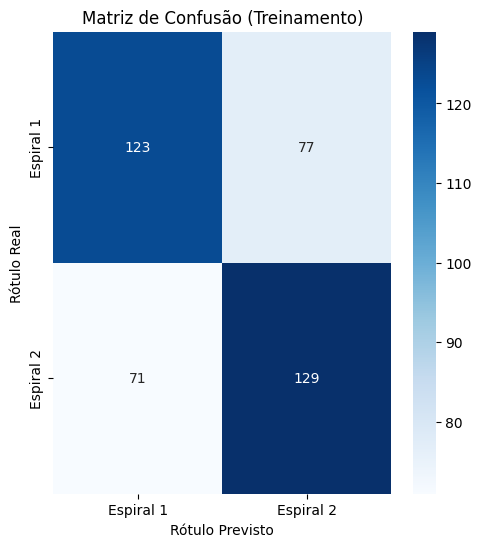

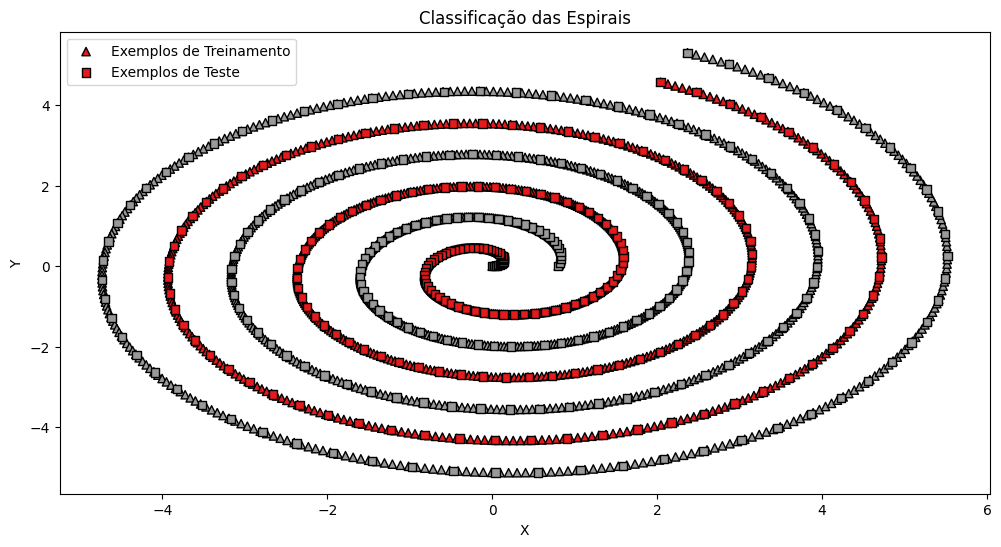

In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix

# Função para gerar os exemplos de treinamento
def generate_training_examples():
    thetas = np.linspace(0, 20, num=1000)  # Valores igualmente espaçados entre 0 e 20 radianos
    spiral1_x = (thetas / 4) * np.cos(thetas)
    spiral1_y = (thetas / 4) * np.sin(thetas)
    spiral2_x = ((thetas / 4) + 0.8) * np.cos(thetas)
    spiral2_y = ((thetas / 4) + 0.8) * np.sin(thetas)
    
    # Criando os exemplos de treinamento
    X = np.vstack((np.column_stack((spiral1_x, spiral1_y)), np.column_stack((spiral2_x, spiral2_y))))
    y = np.hstack((np.zeros(len(spiral1_x)), np.ones(len(spiral2_x))))
    
    return X, y

# Gerando exemplos de treinamento
X_train, y_train = generate_training_examples()

# Construindo a rede perceptron de múltiplas camadas
mlp = MLPClassifier(hidden_layer_sizes=(10,), activation='relu', solver='adam', random_state=42)

# Treinando a rede
mlp.fit(X_train, y_train)

# Função para gerar exemplos de teste
def generate_test_examples():
    test_thetas = np.linspace(0, 20, num=200)  # Valores igualmente espaçados entre 0 e 20 radianos
    test_spiral1_x = (test_thetas / 4) * np.cos(test_thetas)
    test_spiral1_y = (test_thetas / 4) * np.sin(test_thetas)
    test_spiral2_x = ((test_thetas / 4) + 0.8) * np.cos(test_thetas)
    test_spiral2_y = ((test_thetas / 4) + 0.8) * np.sin(test_thetas)
    
    # Criando exemplos de teste
    X_test = np.vstack((np.column_stack((test_spiral1_x, test_spiral1_y)), np.column_stack((test_spiral2_x, test_spiral2_y))))
    y_test = np.hstack((np.zeros(len(test_spiral1_x)), np.ones(len(test_spiral2_x))))
    
    return X_test, y_test

# Gerando exemplos de teste
X_test, y_test = generate_test_examples()

# Fazendo previsões com a rede treinada
y_pred = mlp.predict(X_test)

# Calculando a matriz de confusão
confusion_mtx = confusion_matrix(y_test, y_pred)

# Criando um DataFrame com os valores da matriz de confusão e rótulos das classes
class_labels = ['Espiral 1', 'Espiral 2']
confusion_df = pd.DataFrame(confusion_mtx, index=class_labels, columns=class_labels)

# Imprimindo a matriz de confusão

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.heatmap(confusion_df, annot=True, fmt="d", cmap='Blues')
plt.title('Matriz de Confusão (Treinamento)')
plt.xlabel('Rótulo Previsto')
plt.ylabel('Rótulo Real')

# Plotando os exemplos de treinamento e teste
plt.figure(figsize=(12, 6))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.Set1, edgecolor='k',marker='^', label='Exemplos de Treinamento')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.Set1, edgecolor='k', marker='s', label='Exemplos de Teste')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Classificação das Espirais')
plt.legend()
plt.show()
